In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [59]:

df = pd.read_excel("D:/internship preparation/buckman/Sample_Data.xlsx")
df.head()


,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement


**DATA CLEANING AND UNDERSTANDING**

Initially we check for null values.

And while looking into the data set, to make it more understandable I have used the integral ranges.



In [5]:
df.isnull().sum()
# isnull is used to find the columns that has null .sum() -> calculate the no of rows in that column with null values

S. No.                                                0
City                                                  0
Gender                                                0
Marital Status                                        0
Age                                                   0
Education                                             0
Role                                                  0
Number of investors in family                         0
Household Income                                      0
Percentage of Investment                              0
Source of Awareness about Investment                  0
Knowledge level about different investment product    0
Knowledge level about sharemarket                     0
Knowledge about Govt. Schemes                         0
Investment Influencer                                 0
Investment Experience                                 0
Risk Level                                            0
Return Earned                                   

In [6]:
#cleaning 'Returns Earned'
#making the return Earned as classifiable
df1=pd.DataFrame(df)
df1['Return Earned'].unique()

array(['Negative Return', '10 to 12 ', '1 to 4', '5 to 6', '7 to 9',
       'More than 13'], dtype=object)

In [7]:
lst=df1['Return Earned']
lst

0      Negative Return
1            10 to 12 
2               1 to 4
3            10 to 12 
4               5 to 6
            ...       
805          10 to 12 
806    Negative Return
807          10 to 12 
808    Negative Return
809             5 to 6
Name: Return Earned, Length: 810, dtype: object

In [8]:
temp=[]
for i in lst:
  if i == 'Negative Return':
    temp.append(-1)
  elif i == 'More than 13':
    temp.append(13)
  else:
    temp.append((int(i.split(' ')[0]) +  int(i.split(' ')[2]))/2)
df1['Return Earned']=temp

df1

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,-1.0,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,11.0,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,2.5,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,11.0,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5.5,Fun and Exitement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806,Seattle,Men,Married,Early Working,Secondary,Top Executives,1,US$ 2735,Don't Want to Reveal,Friends,2,3,1,Intermediaries,7 Years to 9 Years,Medium,11.0,Return
806,807,Seattle,Men,Never Married,Children,Secondary,Top Executives,4,Above US$ 30086,11% to 15%,Magazine,1,9,3,Workers Reference,7 Years to 9 Years,Low,-1.0,Inflation
807,808,San Francisco,Men,Never Married,Children,Uneducated,Advertising and Promotion Executive,1,US$ 13676 to US$ 19145,11% to 15%,Others,1,5,5,Social Media,Less Than 1 Year,High,11.0,Tax
808,809,Memphis,Women,Married,Children,Uneducated,Marketing and Sales Executive,3,US$ 19146 to US$ 24615,16% to 20%,Workers,6,5,2,Social Media,1 Year to 3 Years,High,-1.0,Return


In [9]:
pd.get_dummies(df1['Return Earned'])

,-1.0,2.5,5.5,8.0,11.0,13.0
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,False,True,False,False,False,False
3,False,False,False,False,True,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
805,False,False,False,False,True,False
806,True,False,False,False,False,False
807,False,False,False,False,True,False
808,True,False,False,False,False,False


In [10]:
#cleaning 'house income' feature

lst2 = df1['Household Income'].tolist()

df1['Household Income'].unique()




array(['US$ 2736 to US$ 8205', 'US$ 19146 to US$ 24615',
       'US$ 13676 to US$ 19145', 'Above US$ 30086',
       'US$ 24616 to US$ 30085', 'US$ 2735', 'US$ 8206 to US$ 13675'],
      dtype=object)

income category order:


*   2735
*   2736-8205
*   8206-13675
*   13676-19145
*   19146-24615
*   24616-30085
*   more 30086











In [11]:
import re

def convert_to_ranges(data):
    ranges = []
    for item in data:
        if item.startswith('Above'):
            lower_bound = int(re.search(r'\d+', item).group())
            upper_bound = float('inf')
        else:
            match = re.match(r"US\$ (\d+)(?: to US\$ (\d+))?", item)
            lower_bound = int(match.group(1))
            upper_bound = int(match.group(2)) if match.group(2) else lower_bound
        ranges.append((lower_bound, upper_bound))
    return ranges

df1['Household Income'] = convert_to_ranges(df['Household Income'])




In [12]:
df1['Household Income'].unique()

array([(2736, 8205), (19146, 24615), (13676, 19145), (30086, inf),
       (24616, 30085), (2735, 2735), (8206, 13675)], dtype=object)

In [13]:
df['Percentage of Investment'].unique()

array(["Don't Want to Reveal", 'Above 26%', '16% to 20%', '21% to 25%',
       'Upto 5%', '11% to 15%', '6% to 10%'], dtype=object)

In [14]:
def convert_percentage(data):
    ranges = []
    for item in data:
        if item == "Don't Want to Reveal":
            ranges.append((None, None))
        elif item.startswith('Above'):
            lower_bound = int(item.split(' ')[1].replace('%', ''))
            upper_bound = float('inf')
            ranges.append((lower_bound, upper_bound))
        elif item.startswith('Upto'):
            upper_bound = int(item.split(' ')[1].replace('%', ''))
            lower_bound = 0
            ranges.append((lower_bound, upper_bound))
        else:
            lower_bound = int(item.split('%')[0].split(' ')[0])
            upper_bound = int(item.split('%')[1].split(' ')[2])
            ranges.append((lower_bound, upper_bound))
    return ranges

df1['Percentage of Investment'] = convert_percentage(df['Percentage of Investment'])
df1['Percentage of Investment'].unique()
df1

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,"(2736, 8205)","(None, None)",Television,7,9,4,Family Reference,Less Than 1 Year,Low,-1.0,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,"(19146, 24615)","(None, None)",Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,11.0,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,"(2736, 8205)","(26, inf)",Family,4,3,2,Friends Reference,Above 9 Years,Low,2.5,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,"(19146, 24615)","(16, 20)",Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,11.0,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,"(13676, 19145)","(16, 20)",Workers,6,10,5,Family Reference,Above 9 Years,Low,5.5,Fun and Exitement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806,Seattle,Men,Married,Early Working,Secondary,Top Executives,1,"(2735, 2735)","(None, None)",Friends,2,3,1,Intermediaries,7 Years to 9 Years,Medium,11.0,Return
806,807,Seattle,Men,Never Married,Children,Secondary,Top Executives,4,"(30086, inf)","(11, 15)",Magazine,1,9,3,Workers Reference,7 Years to 9 Years,Low,-1.0,Inflation
807,808,San Francisco,Men,Never Married,Children,Uneducated,Advertising and Promotion Executive,1,"(13676, 19145)","(11, 15)",Others,1,5,5,Social Media,Less Than 1 Year,High,11.0,Tax
808,809,Memphis,Women,Married,Children,Uneducated,Marketing and Sales Executive,3,"(19146, 24615)","(16, 20)",Workers,6,5,2,Social Media,1 Year to 3 Years,High,-1.0,Return


In [15]:
#finding the unique values in the features

df['Role'].unique()
'''array(['Marketing and Sales Executive',
       'Advertising and Promotion Executive',
       'Training and Development Executive',
       'Computer and Information System Executive', 'Top Executives'],
      dtype=object)'''

df['Age'].unique()
'''array(['Early Working', 'Elderly', 'Prime Working', 'Mature Working',
       'Children'], dtype=object)'''

df['Education'].unique()
'''array(['Secondary', 'Middle', 'Teritary', 'Uneducated', 'Primary'],
      dtype=object)'''

df['Source of Awareness about Investment'].unique()
'''array(['Television', 'Workers', 'Family', 'Magazine', 'Others',
       'Flash Board', 'Friends'], dtype=object)'''

df['Investment Influencer'].unique()
'''array(['Family Reference', 'Workers Reference', 'Friends Reference',
       'Institutions', 'Others', 'Social Media', 'Intermediaries'],
      dtype=object)'''

df['Risk Level'].unique()
'''array(['Low', 'High', 'Medium'], dtype=object)'''

df['Reason for Investment'].unique()
'''array(['Tax', 'Others', 'Return', 'Fun and Exitement', 'Status',
       'Inflation'], dtype=object)'''

df['City'].unique()
'''array(['New York', 'Seattle', 'San Francisco', 'Memphis', 'Houston'],
      dtype=object)'''



"array(['New York', 'Seattle', 'San Francisco', 'Memphis', 'Houston'],\n      dtype=object)"

In [16]:
#understanding 'investement experience'
df['Investment Experience'].unique()

array(['Less Than 1 Year', 'Above 9 Years', '7 Years to 9 Years',
       '1 Year to 3 Years', '4 Years to 6 Years'], dtype=object)

In [17]:
def convert_to_ranges(data):
    ranges = []
    for item in data:
        if item.startswith('Above'):
            lower_bound = int(item.split(' ')[1])
            upper_bound = float('inf')
        else:
            years = [int(s) for s in item.split() if s.isdigit()]
            if 'Less' in item:
                lower_bound = 0
                upper_bound = years[0] if years else 1
            elif len(years) == 1:
                lower_bound = upper_bound = years[0]
            else:
                lower_bound, upper_bound = years
        ranges.append((lower_bound, upper_bound))
    return ranges


df1['Investment Experience'] = convert_to_ranges(df['Investment Experience'])


df1['Investment Experience'].unique()


array([(0, 1), (9, inf), (7, 9), (1, 3), (4, 6)], dtype=object)

In [18]:
df1

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,"(2736, 8205)","(None, None)",Television,7,9,4,Family Reference,"(0, 1)",Low,-1.0,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,"(19146, 24615)","(None, None)",Workers,7,5,2,Workers Reference,"(0, 1)",Low,11.0,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,"(2736, 8205)","(26, inf)",Family,4,3,2,Friends Reference,"(9, inf)",Low,2.5,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,"(19146, 24615)","(16, 20)",Family,5,1,3,Friends Reference,"(7, 9)",Low,11.0,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,"(13676, 19145)","(16, 20)",Workers,6,10,5,Family Reference,"(9, inf)",Low,5.5,Fun and Exitement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806,Seattle,Men,Married,Early Working,Secondary,Top Executives,1,"(2735, 2735)","(None, None)",Friends,2,3,1,Intermediaries,"(7, 9)",Medium,11.0,Return
806,807,Seattle,Men,Never Married,Children,Secondary,Top Executives,4,"(30086, inf)","(11, 15)",Magazine,1,9,3,Workers Reference,"(7, 9)",Low,-1.0,Inflation
807,808,San Francisco,Men,Never Married,Children,Uneducated,Advertising and Promotion Executive,1,"(13676, 19145)","(11, 15)",Others,1,5,5,Social Media,"(0, 1)",High,11.0,Tax
808,809,Memphis,Women,Married,Children,Uneducated,Marketing and Sales Executive,3,"(19146, 24615)","(16, 20)",Workers,6,5,2,Social Media,"(1, 3)",High,-1.0,Return


In [19]:
#classifying all
df2=pd.DataFrame(df)


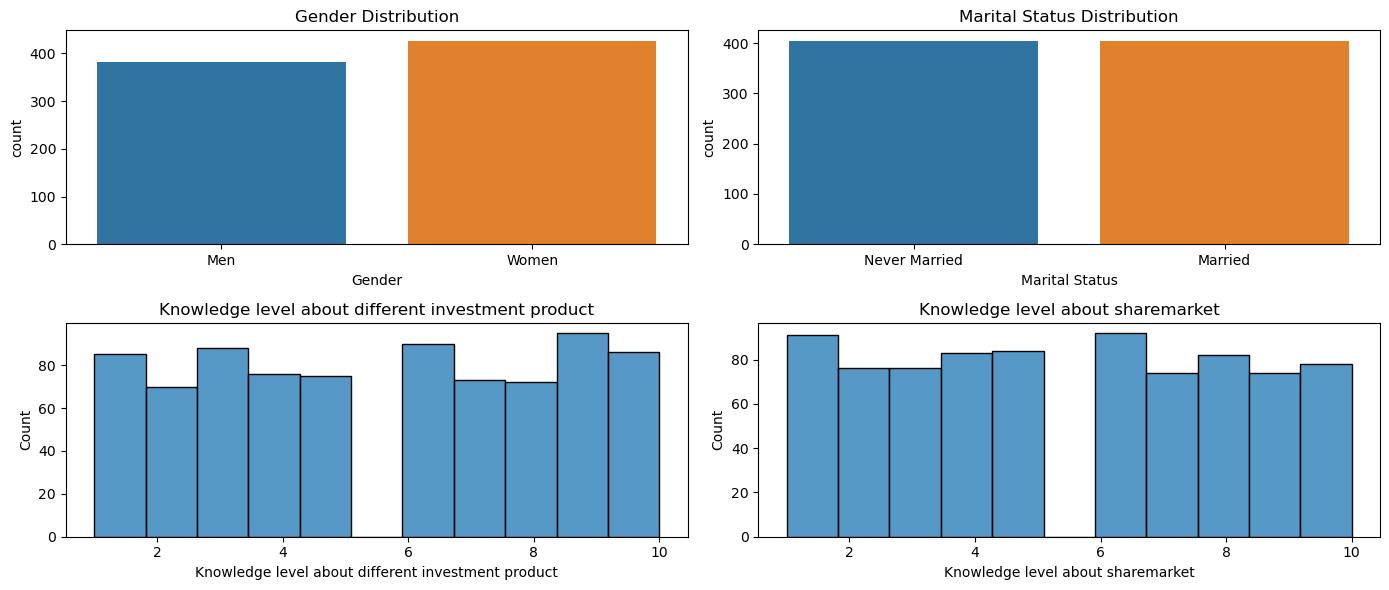

In [20]:
# Convert the data into a DataFrame for easier visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 6))

# Bar plot for categorical variables
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status Distribution')

# Histogram for numerical variables
plt.subplot(2, 2, 3)
sns.histplot(df['Knowledge level about different investment product'])
plt.title('Knowledge level about different investment product')

plt.subplot(2, 2, 4)
sns.histplot(df['Knowledge level about sharemarket'])
plt.title('Knowledge level about sharemarket')

plt.tight_layout()
plt.show()

**1)Investment Behavior Insights**

In [21]:
# Percentage of household income invested distribution
investment_percentage_distribution = df1['Percentage of Investment'].describe()

# Sources of awareness about investments distribution
sources_distribution = df['Source of Awareness about Investment'].value_counts()
'''Source of Awareness about Investment
Workers        133
Television     119
Flash Board    118
Others         115
Family         111
Magazine       110
Friends        104'''

# Knowledge levels distribution
knowledge_levels_distribution = df['Knowledge level about different investment product'].value_counts()
'''Knowledge level about different investment product
9     95
6     90
3     88
10    86
1     85
4     76
5     75
7     73
8     72
2     70'''

# Influencers distribution
influencers_distribution = df['Investment Influencer'].value_counts()
'''Investment Influencer
Friends Reference    133
Intermediaries       127
Social Media         120
Institutions         114
Family Reference     113
Workers Reference    104
Others                99'''

# Risk levels distribution
risk_levels_distribution = df['Risk Level'].value_counts()
'''Risk Level
High      281
Low       270
Medium    259'''

# Reasons for investment distribution
reasons_distribution = df['Reason for Investment'].value_counts()
'''Reason for Investment
Status               143
Inflation            143
Return               139
Others               129
Tax                  128
Fun and Exitement    128'''

percentage=df['Percentage of Investment'].value_counts()


In [22]:
percentage=df['Percentage of Investment'].value_counts()

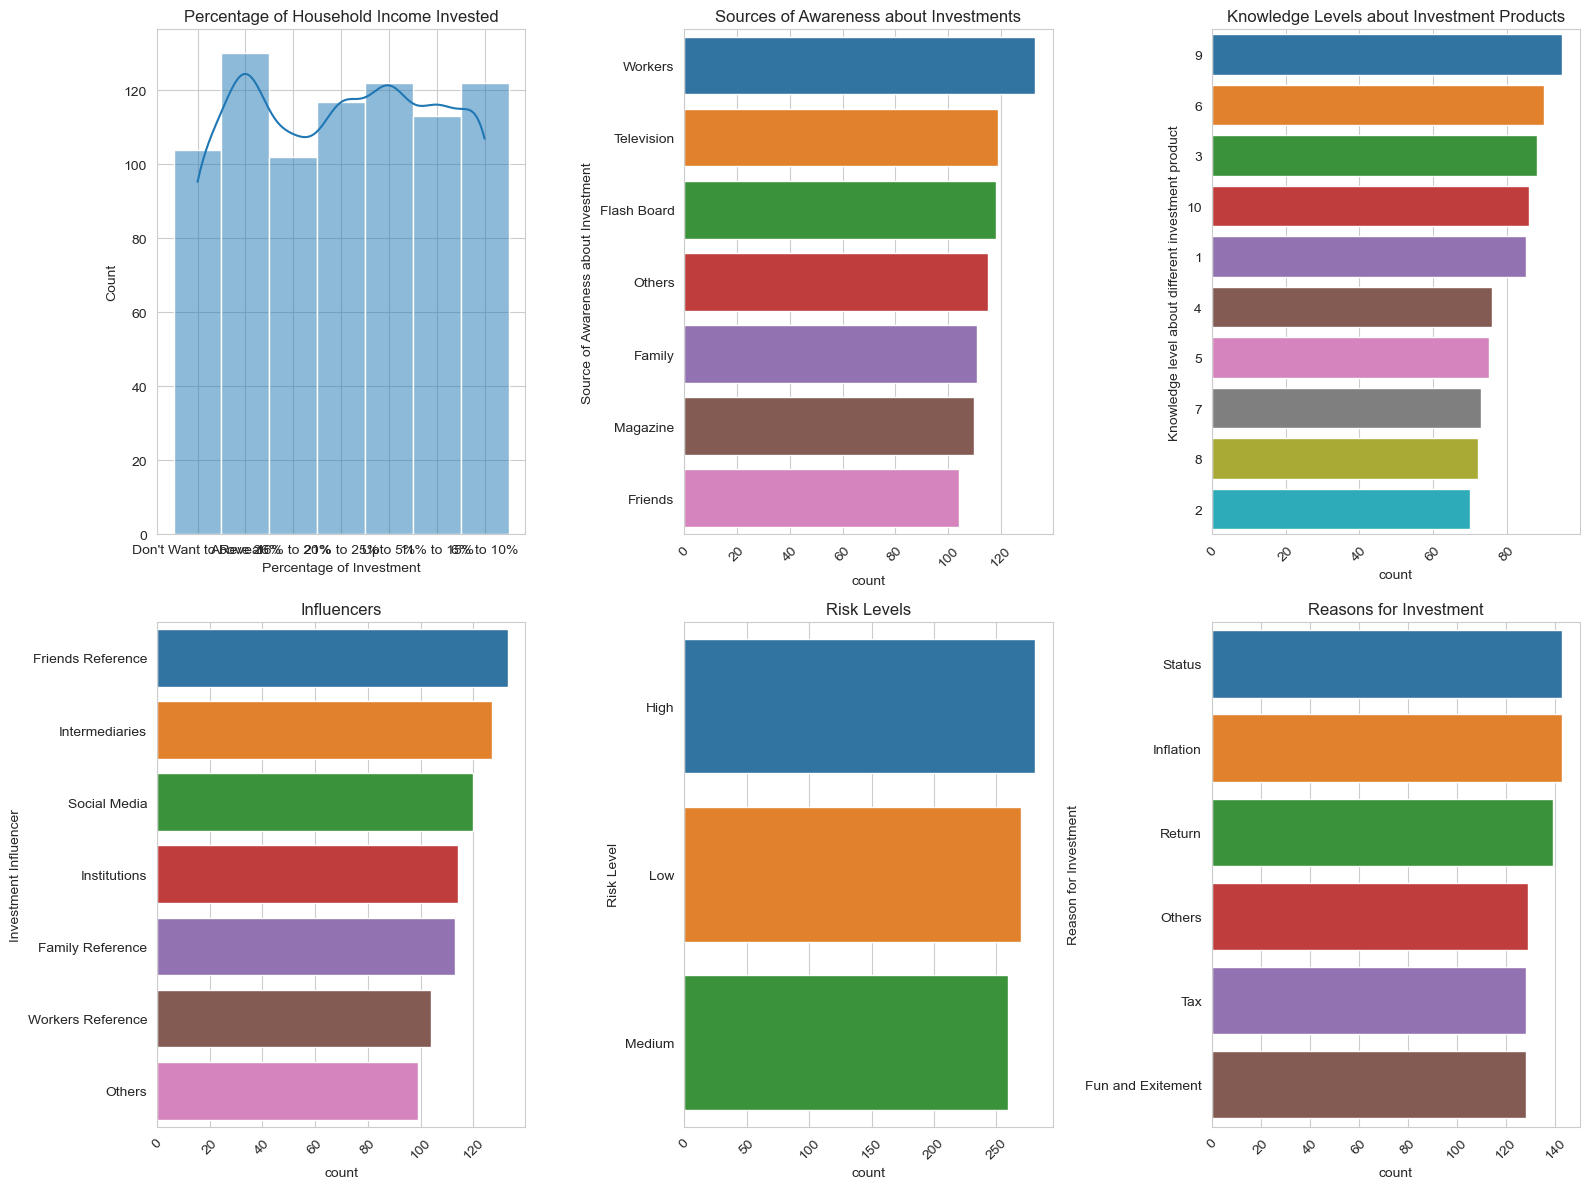

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(16, 12))

# Percentage of household income invested
plt.subplot(2, 3, 1)
sns.histplot(df['Percentage of Investment'], bins=10, kde=True)
plt.title('Percentage of Household Income Invested')

# Sources of awareness about investments
plt.subplot(2, 3, 2)
sns.countplot(y='Source of Awareness about Investment', data=df, order=df['Source of Awareness about Investment'].value_counts().index)
plt.title('Sources of Awareness about Investments')
plt.xticks(rotation=45)

# Knowledge levels about different investment products
plt.subplot(2, 3, 3)
sns.countplot(y='Knowledge level about different investment product', data=df, order=df['Knowledge level about different investment product'].value_counts().index)
plt.title('Knowledge Levels about Investment Products')
plt.xticks(rotation=45)

# Influencers
plt.subplot(2, 3, 4)
sns.countplot(y='Investment Influencer', data=df, order=df['Investment Influencer'].value_counts().index)
plt.title('Influencers')
plt.xticks(rotation=45)

# Risk levels
plt.subplot(2, 3, 5)
sns.countplot(y='Risk Level', data=df, order=df['Risk Level'].value_counts().index)
plt.title('Risk Levels')
plt.xticks(rotation=45)

# Reasons for investment
plt.subplot(2, 3, 6)
sns.countplot(y='Reason for Investment', data=df, order=df['Reason for Investment'].value_counts().index)
plt.title('Reasons for Investment')
plt.xticks(rotation=45)


plt.tight_layout()


plt.show()


In [24]:
#useage of One Hot encoding
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
print(df_encoded)


     S. No.  Number of investors in family  \
0         1                              2   
1         2                              2   
2         3                              2   
3         4                              5   
4         5                              2   
..      ...                            ...   
805     806                              1   
806     807                              4   
807     808                              1   
808     809                              3   
809     810                              1   

     Knowledge level about different investment product  \
0                                                    7    
1                                                    7    
2                                                    4    
3                                                    5    
4                                                    6    
..                                                 ...    
805                               

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df_encoded = pd.concat([df.drop(columns=categorical_columns), one_hot_df], axis=1)

print("Encoded investment data:")
print(df_encoded)


Encoded investment data:
     S. No.  Number of investors in family  \
0         1                              2   
1         2                              2   
2         3                              2   
3         4                              5   
4         5                              2   
..      ...                            ...   
805     806                              1   
806     807                              4   
807     808                              1   
808     809                              3   
809     810                              1   

     Knowledge level about different investment product  \
0                                                    7    
1                                                    7    
2                                                    4    
3                                                    5    
4                                                    6    
..                                                 ...    
805      

c:\Softwares\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
#Here we used LabelEncoder to encode
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Separate features and target variable
X = df.drop('Return Earned', axis=1)
y = df['Return Earned']

# Select top 5 features using chi-square test
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

print(f"Selected features: {selected_feature_names}")


Selected features: Index(['S. No.', 'Household Income', 'Source of Awareness about Investment',
       'Knowledge about Govt. Schemes', 'Reason for Investment'],
      dtype='object')


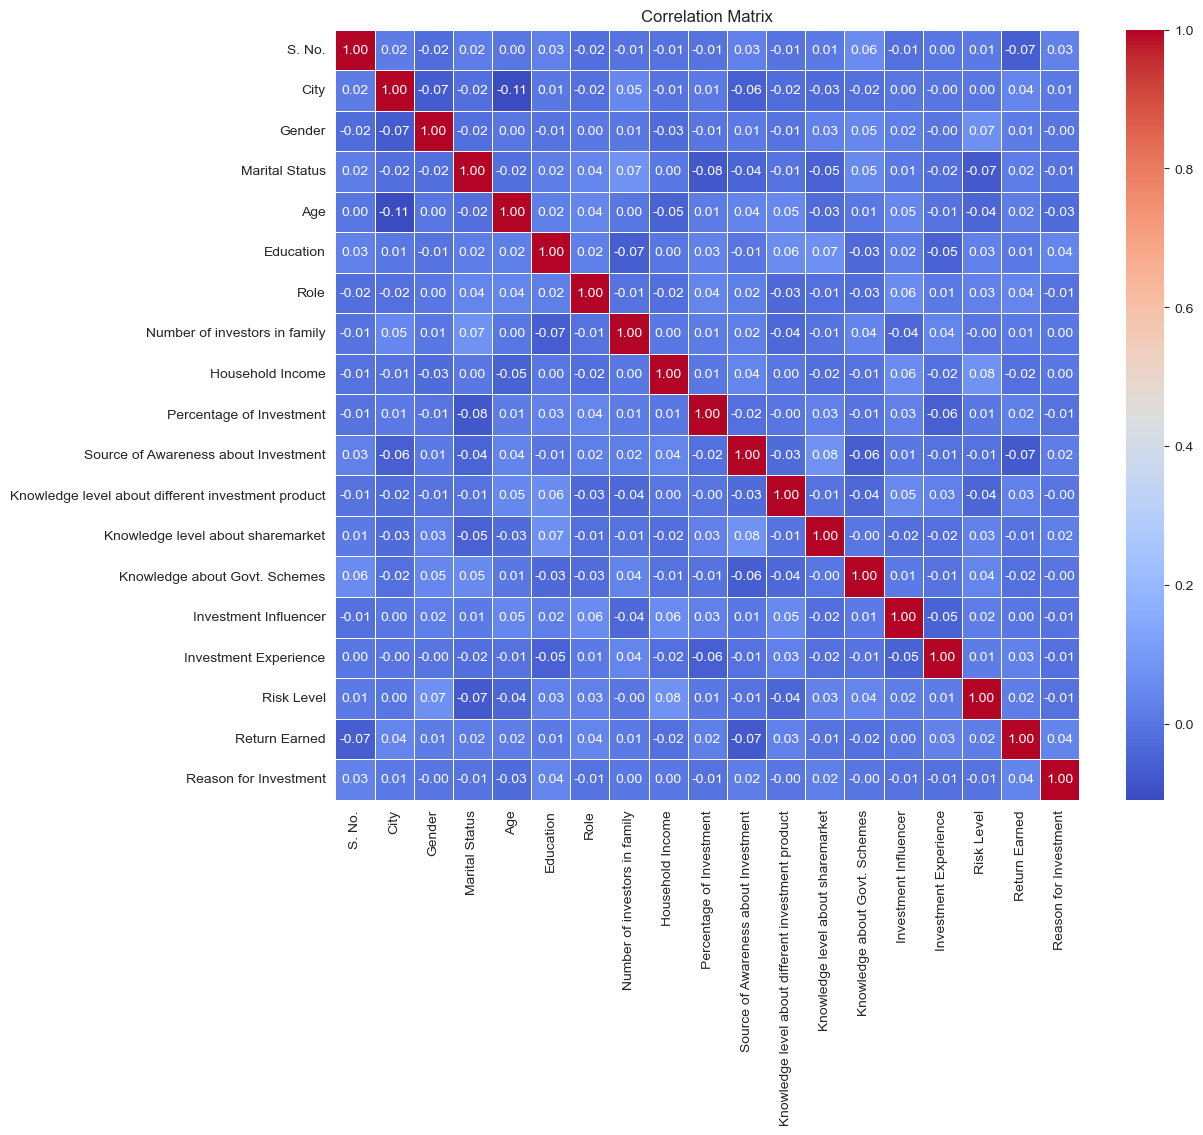

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


***Best Investment Decision Identification***



> 1. Based on the dataset, identify factors that contribute to making the best investment
decision



**UnderStanding The feature analysis**

From both Chi-Square test and Random Forest model learning, the Top features are learnt. ie) these features have much more value in contributing to the "Return Earned"

Top-Features being :


*  'Knowledge level about sharemarket'
*  'Knowledge level about different investment product'
*   'Investment Influencer'
*   'Percentage of Investment'

and
Least-contributing features being :


*   Gender
*   Martial Status



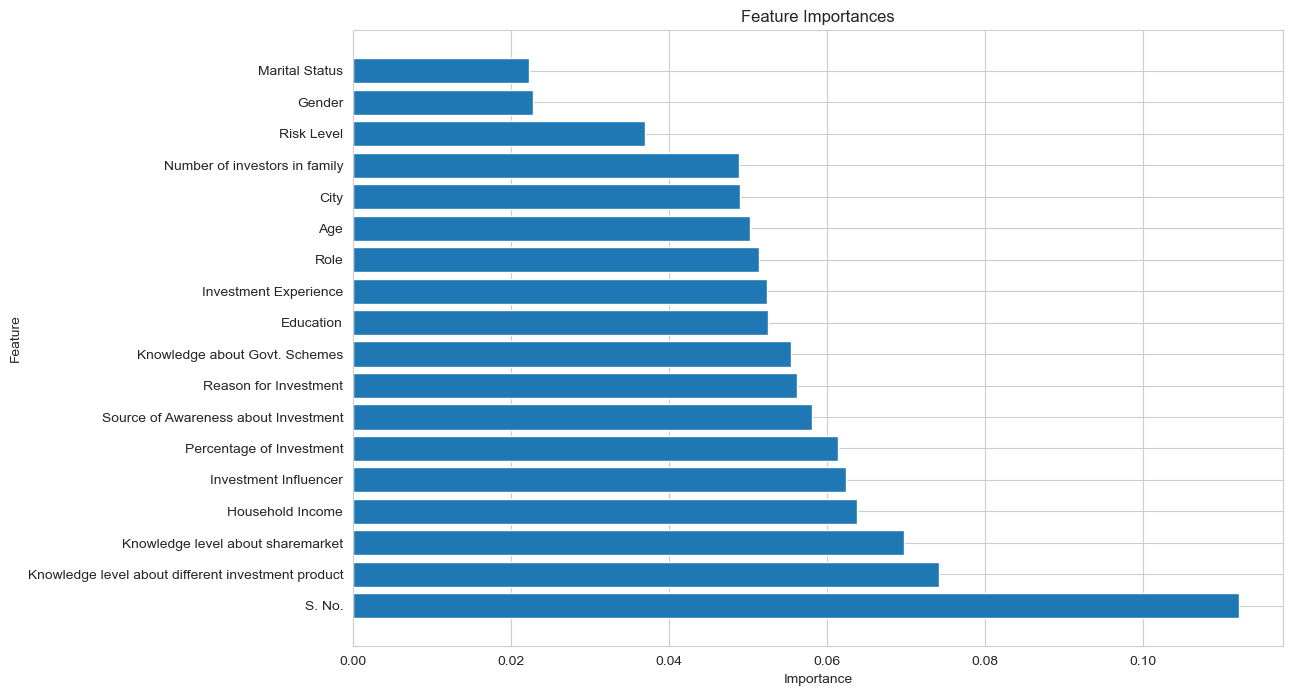

Top features: ['Knowledge level about different investment product', 'Knowledge level about sharemarket', 'Household Income', 'Investment Influencer']


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.drop('Return Earned', axis=1)
y = df['Return Earned']

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Select top features based on importance
top_features = feature_importance_df['Feature'][1:5].tolist()
print(f"Top features: {top_features}")




> 2. Determine which demographic, employment, and behavioral characteristics correlate with
successful investment outcomes

To approach this:

Chi-Square Test: Conducted a chi-square test for each categorical variable in X to determine if there is a significant association between the variable and the Returns.

Train a Random Forest Classifier

Get Feature Importances: Get the feature importances from the trained Random Forest classifier.

Performed additional analysis and interpretation based on the results to determine which demographic, employment, and behavioral characteristics correlate with successful investment outcomes.

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Data Preprocessing
# Assume 'Return Earned' is the target variable
X = df.drop('Return Earned', axis=1)
y = df['Return Earned']

# Correlation Analysis
correlation_matrix = X.corr()

# Chi-Square Test (for categorical variables)
categorical_columns = X.select_dtypes(include=['object']).columns
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p_val

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#here we get the feature importances
feature_importances = rf_classifier.feature_importances_

#displaying the results
print("Correlation Matrix:")
print(correlation_matrix)
print("\nChi-Square Test Results:")
for col, p_val in chi2_results.items():
    print(f"{col}: p-value = {p_val}")
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")




Correlation Matrix:
                                                      S. No.      City  \
S. No.                                              1.000000  0.016302   
City                                                0.016302  1.000000   
Gender                                             -0.023493 -0.068255   
Marital Status                                      0.017239 -0.021529   
Age                                                 0.002389 -0.109233   
Education                                           0.029114  0.007171   
Role                                               -0.022554 -0.016187   
Number of investors in family                      -0.006152  0.050827   
Household Income                                   -0.009933 -0.007409   
Percentage of Investment                           -0.005534  0.009494   
Source of Awareness about Investment                0.027590 -0.059268   
Knowledge level about different investment product -0.007306 -0.023879   
Knowledge level ab

***3)Recommendation System Development:***



> 1.Utilize machine learning techniques to build a recommendation system that can predict the
best investment decision for new data.




In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest Classifier
X = df[['Knowledge level about sharemarket', 'Knowledge level about different investment product', 'Source of Awareness about Investment', 'Household Income']]
y = df['Return Earned']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions (testing)
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.26      0.27        31
           1       0.24      0.28      0.25        29
           2       0.14      0.13      0.14        30
           3       0.11      0.12      0.11        26
           4       0.10      0.11      0.10        19
           5       0.17      0.15      0.16        27

    accuracy                           0.18       162
   macro avg       0.17      0.17      0.17       162
weighted avg       0.18      0.18      0.18       162



Here i have checked the presence of outliters, using first quartile and third quartile.

And the results was found to be that no presence of outliers, which is great , to train the model.

Rows containing outliers:
Empty DataFrame
Columns: [S. No., City, Gender, Marital Status, Age, Education, Role, Number of investors in family, Household Income, Percentage of Investment, Source of Awareness about Investment, Knowledge level about different investment product, Knowledge level about sharemarket, Knowledge about Govt. Schemes, Investment Influencer, Investment Experience, Risk Level, Return Earned, Reason for Investment]
Index: []


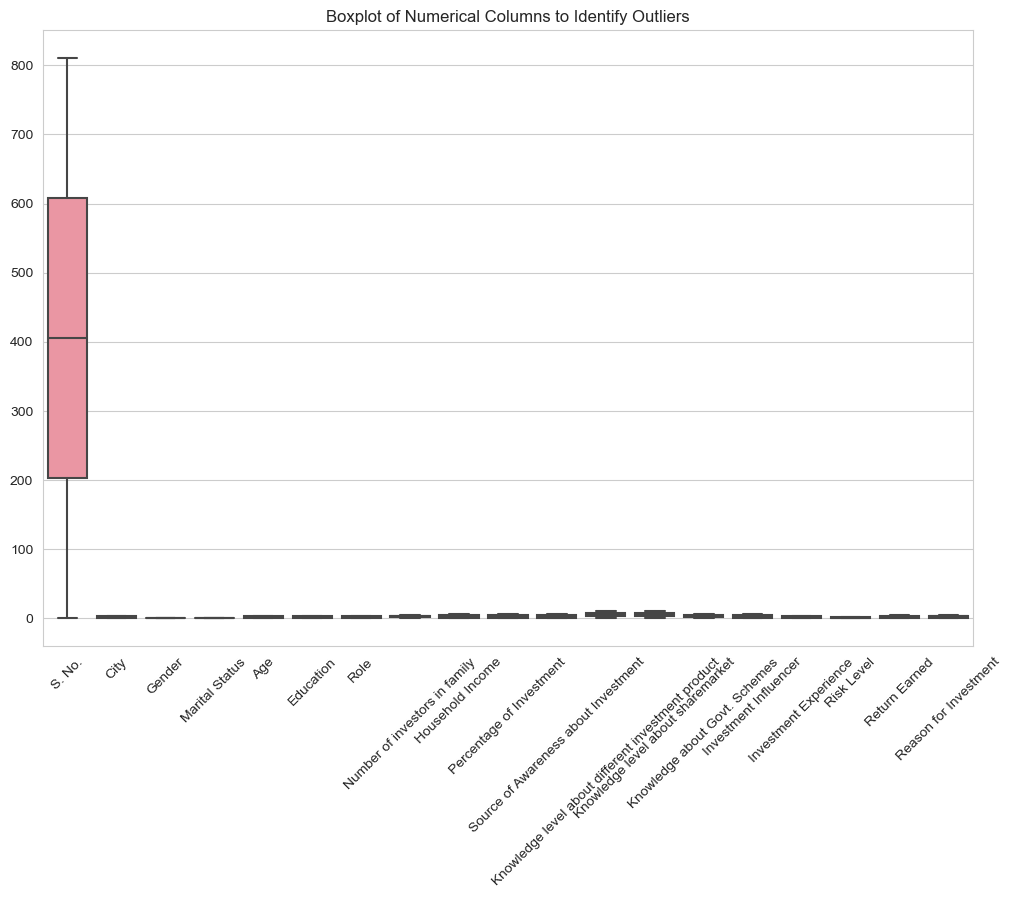

In [58]:
#outlier detection
import pandas as pd


numerical_cols = df.select_dtypes(include='number').columns

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)

# Calculate the Interquartile Range
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Find outliers
outliers = (df[numerical_cols] < (Q1 - threshold * IQR)) | (df[numerical_cols] > (Q3 + threshold * IQR))

# Print the rows containing outliers
print("Rows containing outliers:")
print(df[outliers.any(axis=1)])




# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns to Identify Outliers")
plt.show()




Building and evaluating all the training models:

From this we can clearly say about the performance of the recommendation system of difference models.

Using various metrics such as accuracy, precision, recall, and F1-score. The "best" model would typically be the one that achieves the highest scores across these metrics.

Here using the Machine LEarning - neural networks model.


In [32]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

#random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

#neural network
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLPClassifier with increased max_iter
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = mlp_clf.predict(X_test_scaled)


#evaluation metrics for all
from sklearn.metrics import classification_report
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Neural Network:")
print(classification_report(y_test, y_pred_nn))


Decision Tree:
              precision    recall  f1-score   support

           0       0.29      0.23      0.25        31
           1       0.21      0.31      0.25        29
           2       0.21      0.17      0.19        30
           3       0.22      0.23      0.23        26
           4       0.05      0.05      0.05        19
           5       0.13      0.11      0.12        27

    accuracy                           0.19       162
   macro avg       0.18      0.18      0.18       162
weighted avg       0.19      0.19      0.19       162

Random Forest:
              precision    recall  f1-score   support

           0       0.29      0.26      0.27        31
           1       0.24      0.28      0.25        29
           2       0.14      0.13      0.14        30
           3       0.11      0.12      0.11        26
           4       0.10      0.11      0.10        19
           5       0.17      0.15      0.16        27

    accuracy                           0.18    

c:\Softwares\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


----------------------------------------------------------------------------------------
RELEARNING: (Please infer the results from here)
Since We are building a Recommendation System :
That is given the clients details the model should recommend him The percentage of investment he should get, such that he gets much profit for his features.

Change from my previous approaches:

USE PERCENTAGE OF INVESTMENT TO RECOMMEND

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Dictionary to store encoding information
encoding_info = {}

# Encode categorical columns
for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    # Store encoding information
    

# Separate features and target variable
X = df.drop('Percentage of Investment', axis=1)
y = df['Percentage of Investment']

# Select top 5 features using chi-square test
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Dictionary to store feature selection information
feature_selection_info = {
    "selected_features": selected_feature_names.tolist(),
    "scores": selector.scores_.tolist()
}



print("\nSelected features:")
print(selected_feature_names)

# Print feature selection information
print("\nFeature Selection Information:")
print(feature_selection_info)




Selected features:
Index(['S. No.', 'Role', 'Knowledge level about different investment product',
       'Investment Influencer', 'Return Earned'],
      dtype='object')

Feature Selection Information:
{'selected_features': ['S. No.', 'Role', 'Knowledge level about different investment product', 'Investment Influencer', 'Return Earned'], 'scores': [389.8491633948299, 4.047448551211681, 0.44031412066083203, 4.4469568117173, 4.0967606945080846, 7.431002344646254, 10.98712004532755, 3.8557528106983856, 1.3793511863568446, 3.495605388744059, 13.374459533885819, 4.295986891602299, 0.614220097693017, 13.407256857158444, 9.039224928213692, 4.761813268440632, 11.319975434378211, 6.786373955195057]}


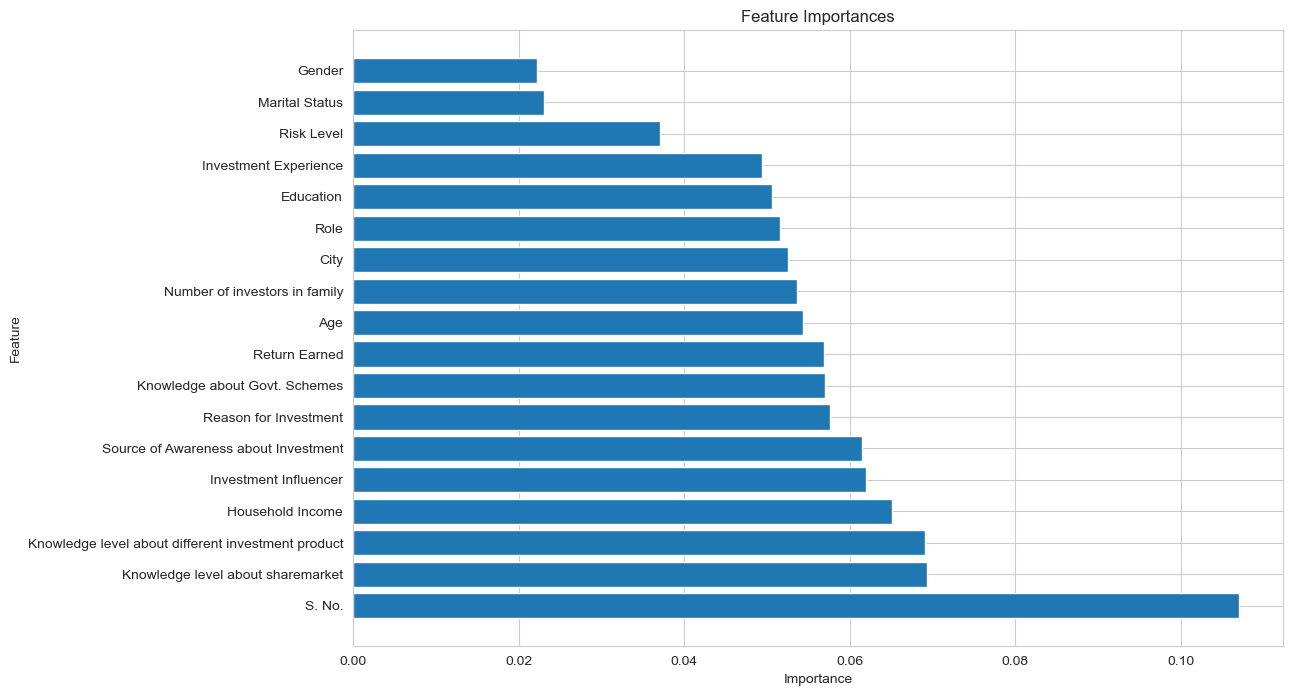

Top features: ['Knowledge level about sharemarket', 'Knowledge level about different investment product', 'Household Income', 'Investment Influencer']


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.drop('Percentage of Investment', axis=1)
y = df['Percentage of Investment']

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Select top features based on importance
top_features = feature_importance_df['Feature'][1:5].tolist()
print(f"Top features: {top_features}")


Now the process is clear ie) to get the recommendation on how much to invest for the clients details we use these features .
this is done using chi-square test

Here entire df is encoded as categorical values
to note that there are some people who doesnt wish to disclose their percentage of investment 
therefore when training the model we have to eliminate the empty values => here the doesnt disclose values 
where the Percentage of investment is classified as 0.

In [56]:
p1 = df['Percentage of Investment'].unique()
p2 = df2['Percentage of Investment'].unique()

# Create a mapping from p1 to p2
mapping = {val1: val2 for val1, val2 in zip(p1, p2)}

print("Mapping:")
print(mapping)


'''Mapping:
{5: "Don't Want to Reveal", 
4: 'Above 26%', 1: '16% to 20%', 2: '21% to 25%', 6: 'Upto 5%', 0: '11% to 15%', 3: '6% to 10%'}'''

#Delete rows with class 0 of Percentage of Investment
#cause they dont want to reveal and it will affect the training
df_filtered = df[df['Percentage of Investment'] != 5].copy()
df_filtered





Mapping:
{5: "Don't Want to Reveal", 4: 'Above 26%', 1: '16% to 20%', 2: '21% to 25%', 6: 'Upto 5%', 0: '11% to 15%', 3: '6% to 10%'}


,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
2,3,4,1,0,1,3,4,2,5,4,0,4,3,2,1,3,1,0,3
3,4,3,0,1,2,4,4,5,2,1,0,5,1,3,1,2,1,1,5
4,5,3,0,0,4,1,1,2,1,1,6,6,10,5,0,3,1,2,0
5,6,1,1,1,4,1,2,5,2,2,3,3,9,1,2,4,0,5,4
6,7,4,1,1,4,3,4,5,2,6,3,6,4,4,4,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,4,1,0,4,4,3,4,0,6,2,1,5,5,4,0,0,5,3
806,807,4,0,1,0,2,3,4,0,0,3,1,9,3,6,2,1,5,1
807,808,3,0,1,0,4,0,1,1,0,4,1,5,5,5,4,0,1,5
808,809,1,1,0,0,4,2,3,2,1,6,6,5,2,5,0,0,5,3


2.Determine which demographic, employment, and behavioral characteristics correlate with successful investment outcomes
To approach this:

Chi-Square Test: Conducted a chi-square test for each categorical variable in X to determine if there is a significant association between the variable and the Returns.

Train a Random Forest Classifier

Get Feature Importances: Get the feature importances from the trained Random Forest classifier.

Performed additional analysis and interpretation based on the results to determine which demographic, employment, and behavioral characteristics correlate with successful investment outcomes.

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Data Preprocessing
# Assume 'Return Earned' is the target variable
X = df.drop('Percentage of Investment', axis=1)
y = df['Percentage of Investment']

# Correlation Analysis
correlation_matrix = X.corr()

# Chi-Square Test (for categorical variables)
categorical_columns = X.select_dtypes(include=['object']).columns
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(X[col], y)
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p_val

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#here we get the feature importances
feature_importances = rf_classifier.feature_importances_

#displaying the results
print("Correlation Matrix:")
print(correlation_matrix)
print("\nChi-Square Test Results:")
for col, p_val in chi2_results.items():
    print(f"{col}: p-value = {p_val}")
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")




Correlation Matrix:
                                                      S. No.      City  \
S. No.                                              1.000000  0.016302   
City                                                0.016302  1.000000   
Gender                                             -0.023493 -0.068255   
Marital Status                                      0.017239 -0.021529   
Age                                                 0.002389 -0.109233   
Education                                           0.029114  0.007171   
Role                                               -0.022554 -0.016187   
Number of investors in family                      -0.006152  0.050827   
Household Income                                   -0.009933 -0.007409   
Source of Awareness about Investment                0.027590 -0.059268   
Knowledge level about different investment product -0.007306 -0.023879   
Knowledge level about sharemarket                   0.008056 -0.028802   
Knowledge about Go

Recommendation System Development:

1.Utilize machine learning techniques to build a recommendation system that can predict the best investment decision for new data.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest Classifier
X = df[['Knowledge level about sharemarket', 'Knowledge level about different investment product', 'Source of Awareness about Investment', 'Household Income']]
y = df['Percentage of Investment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions (testing)
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.20      0.21        25
           1       0.00      0.00      0.00        22
           2       0.05      0.04      0.05        23
           3       0.12      0.17      0.14        23
           4       0.24      0.21      0.22        24
           5       0.05      0.07      0.06        15
           6       0.24      0.23      0.24        30

    accuracy                           0.14       162
   macro avg       0.13      0.13      0.13       162
weighted avg       0.14      0.14      0.14       162



Building and evaluating all the training models:

In [38]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

#random forest

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


# Assuming rf_clf is your trained Random Forest model
dump(rf_clf, 'random_forest_model.joblib')


#neural network

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLPClassifier with increased max_iter
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = mlp_clf.predict(X_test_scaled)


#evaluation metrics for all

print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Neural Network:")
print(classification_report(y_test, y_pred_nn))


Decision Tree:
              precision    recall  f1-score   support

           0       0.18      0.20      0.19        25
           1       0.07      0.05      0.06        22
           2       0.10      0.09      0.09        23
           3       0.12      0.17      0.15        23
           4       0.06      0.04      0.05        24
           5       0.07      0.13      0.10        15
           6       0.35      0.27      0.30        30

    accuracy                           0.14       162
   macro avg       0.14      0.14      0.13       162
weighted avg       0.15      0.14      0.14       162

Random Forest:
              precision    recall  f1-score   support

           0       0.22      0.20      0.21        25
           1       0.00      0.00      0.00        22
           2       0.05      0.04      0.05        23
           3       0.12      0.17      0.14        23
           4       0.24      0.21      0.22        24
           5       0.05      0.07      0.06     

c:\Softwares\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
from joblib import load

# Load the saved Random Forest model
loaded_rf_clf = load('random_forest_model.joblib')

In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()


# Encode categorical columns
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])
    
   
# Separate features and target variable
X = df.drop('Percentage of Investment', axis=1)
y = df['Percentage of Investment']

# Select top 5 features using chi-square test
k = 5
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Dictionary to store feature selection information
feature_selection_info = {
    "selected_features": selected_feature_names.tolist(),
    "scores": selector.scores_.tolist()
}



# Print selected features
print("\nSelected Features:")
print(selected_feature_names)

# Print feature selection information
print("\nFeature Selection Information:")
print(feature_selection_info)



Selected Features:
Index(['S. No.', 'Role', 'Knowledge level about different investment product',
       'Investment Influencer', 'Return Earned'],
      dtype='object')

Feature Selection Information:
{'selected_features': ['S. No.', 'Role', 'Knowledge level about different investment product', 'Investment Influencer', 'Return Earned'], 'scores': [389.8491633948299, 4.047448551211681, 0.44031412066083203, 4.4469568117173, 4.0967606945080846, 7.431002344646254, 10.98712004532755, 3.8557528106983856, 1.3793511863568446, 3.495605388744059, 13.374459533885819, 4.295986891602299, 0.614220097693017, 13.407256857158444, 9.039224928213692, 4.761813268440632, 11.319975434378211, 6.786373955195057]}


From this we can clearly say about the performance of the recommendation system of difference models.

Using various metrics such as accuracy, precision, recall, and F1-score. The "best" model would typically be the one that achieves the highest scores across these metrics.

In [43]:


# Get user inputs from the terminal
knowledge_sharemarket = int(input("Enter Knowledge level about sharemarket(0-10): "))
knowledge_investment = int(input("Enter Knowledge level about different investment product (0-10): "))
awareness_source = int(input("Enter Source of Awareness about Investment (Television/Workers/Family/Magazine/Others/Flash Board/Friends)(0-6): "))
household_income = int(input("Enter Household Income ('US$ 2736 to US$ 8205', 'US$ 19146 to US$ 24615', 'US$ 13676 to US$ 19145', 'Above US$ 30086','US$ 24616 to US$ 30085', 'US$ 2735', 'US$ 8206 to US$ 13675'):(0-6) "))
# Make a prediction using the trained model
prediction = loaded_rf_clf.predict([[knowledge_sharemarket, knowledge_investment, awareness_source, household_income]])

# Print the prediction
print("Prediction:", prediction)
print("My Recommendation is that you invest in range:",mapping[int(prediction)])



Prediction: [6]
My Recommendation is that you invest in range: Upto 5%


c:\Softwares\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Great!! Now we have build a Recommendation Model System , For User-Friendly Front-end input extraction i have used Flask - please checkout **app.py** .

When app.py is runned , the web page will ask user details and say its recommendation.

**Testing and Validation:**
1. Test the recommendation system with new data samples to validate its accuracy and 
effectiveness.
2. Fine-tune the system if necessary based on testing results.


Approach:
Using the above user defined input generation we can test the data and it accuracy.


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(loaded_rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_rf_clf = grid_search.best_estimator_
y_pred_best = best_rf_clf.predict(X_test)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
